In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("loan_approval_dataset.csv")



In [15]:
df.head(

)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [4]:

df.columns = df.columns.str.strip()



In [5]:

df.drop(columns=['loan_id'], inplace=True)



In [6]:

label_encoders = {}
categorical_cols = ['education', 'self_employed', 'loan_status']



In [7]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:

df.fillna(df.median(numeric_only=True), inplace=True)



In [8]:

X = df.drop('loan_status', axis=1)
y = df['loan_status']



In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [10]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [11]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [12]:

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]



In [13]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)



In [14]:

print("Accuracy:", accuracy)
print("\nClassification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)



Accuracy: 0.905152224824356

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854

ROC AUC Score: 0.9674739509997183


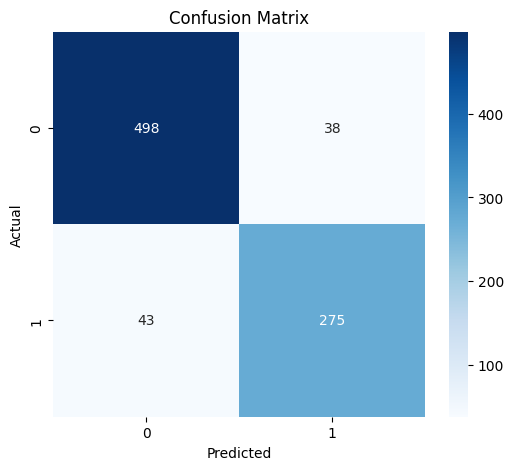

In [19]:

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



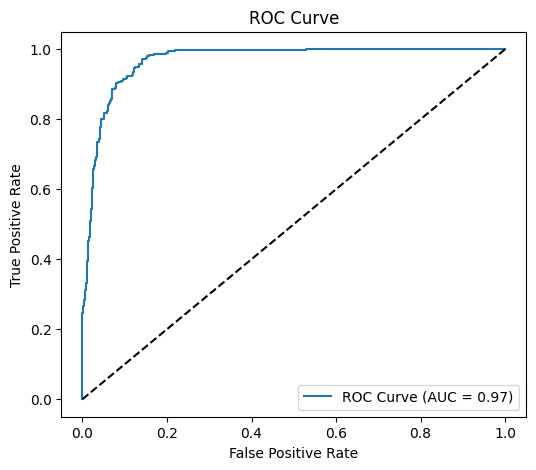

In [18]:

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("F2 Score:", f2)


Precision: 0.8785942492012779
Recall: 0.8647798742138365
F1 Score: 0.8716323296354992
F2 Score: 0.8675078864353313
